# Customer Purchase Prediction
## Facundo Espina

## 1. Problem Definition and Business Understanding

#### Business Problem:
E-commerce companies need to understand customer behavior to boost sales. A major challenge is predicting whether a customer will complete a purchase during a session and identifying key factors influencing this decision. 

This project aims to build a Machine Learning (ML) model that predicts if a customer will purchase based on their interactions with the website. The model will analyze session data and user behavior to estimate the likelihood of a purchase.

#### Business Importance:
Predicting purchases helps businesses improve marketing and user experience. By anticipating when users are likely to buy, businesses can:
- Offer timely discounts or product suggestions.
- Improve website navigation.
- Reduce cart abandonment rates.

These steps can increase conversion rates, retain customers, and drive revenue growth.

#### ML Approach:
We will use supervised classification to predict whether a session will lead to a purchase. The following algorithms will be tested:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Support Vector Machines (SVM)
4. Decision Tree Classifier
5. Random Forest
6. Naive Bayes

#### Dataset Context:
The dataset contains data from 12,330 sessions, each representing a unique user over a 1-year period. It tracks how users interact with an e-commerce platform, including:
- Pages viewed.
- Time spent on pages.
- Bounce and exit rates.
- Visitor type and session details.

This data avoids bias from specific campaigns, holidays, or user profiles. The dataset source is available [here](https://www.kaggle.com/datasets/henrysue/online-shoppers-intention/data).

By applying an ML model to this data, businesses can improve customer experiences, refine marketing strategies, and increase sales by identifying behaviors that lead to purchases.

#### Dataset Features:
- **Administrative:** Number of administrative pages visited.
- **Administrative_Duration:** Time spent on administrative pages.
- **Informational:** Number of informational pages visited.
- **Informational_Duration:** Time spent on informational pages.
- **ProductRelated:** Number of product-related pages visited.
- **ProductRelated_Duration:** Time spent on product-related pages.
- **BounceRates:** Percentage of users who leave after viewing one page.
- **ExitRates:** Percentage of users who end their session on a specific page.
- **PageValues:** Average value of a page based on eCommerce transactions.
- **SpecialDay:** Proximity to holidays like Mother's Day or Valentine’s Day.
- **Month:** Month of the session.
- **OperatingSystems:** Operating system used.
- **Browser:** Browser used.
- **Region:** User's geographic region.
- **TrafficType:** Category of user traffic.
- **VisitorType:** Type of visitor (New, Returning, or Other).
- **Weekend:** Boolean indicating if the session occurred on a weekend.
- **Revenue:** Boolean indicating if a purchase was made.


## 2. Data Exploration

The work done in the Data Exploration is:

- Importing all the necessary libraries
- Read the online shoppers intention data
- Analyze the data with head, info, shape and describe. This to get the number of features and rows, the type, and some statistics about the features.
- Check for the amount of empty values in each feature.
- Analyze the distribution of our target (Revenue)
- Analyze correlations between numerical features.
- Analyze the values of the categorical features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shoppers_user_behavior.csv')

In [3]:
# Print the first 5 rows of the dataset to see the features and a sample of the data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Print the amount of features, name of each one, amount of non-null values and the type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# I prefer to handle values as 0 and 1 instead of False and True, so I convert them to int
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [6]:
df.shape

(12330, 18)

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [8]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Revenue distribution (amount):
Revenue
0    10422
1     1908
Name: count, dtype: int64

Revenue distribution (percentage):
Revenue
0    0.845255
1    0.154745
Name: proportion, dtype: float64


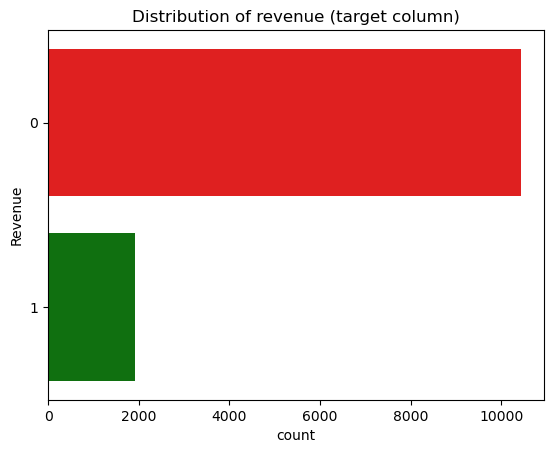

In [9]:
# Check the distribution of our target, Revenue column.
print('Revenue distribution (amount):')
print(df['Revenue'].value_counts())
print('')
print('Revenue distribution (percentage):')
print(df['Revenue'].value_counts(normalize=True))

# Visualization
sns.countplot(data=df, y='Revenue', palette={'0': 'red', '1': 'green'})
plt.title('Distribution of revenue (target column)')
plt.show()

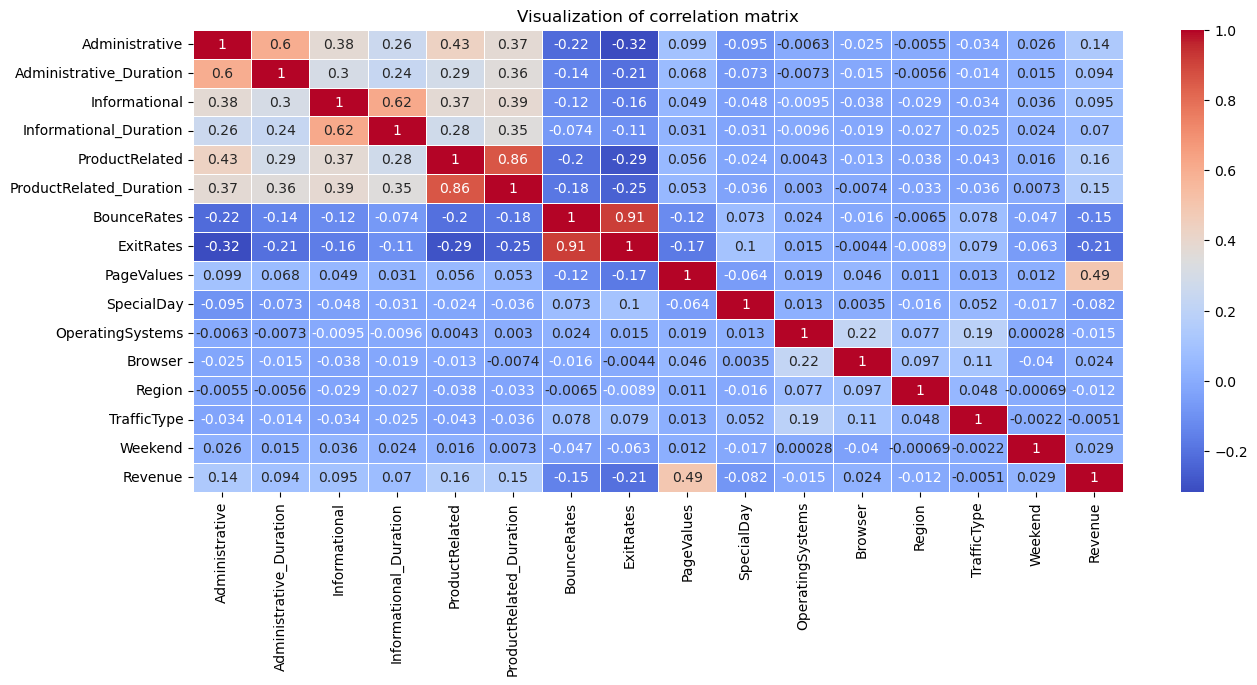

In [10]:
# See correlation between numerical features.
df_numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Visualization of the correlation matrix
plt.figure(figsize=(15, 6))
df_correlations = df_numerical_features.corr()
sns.heatmap(df_correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Visualization of correlation matrix')
plt.show()


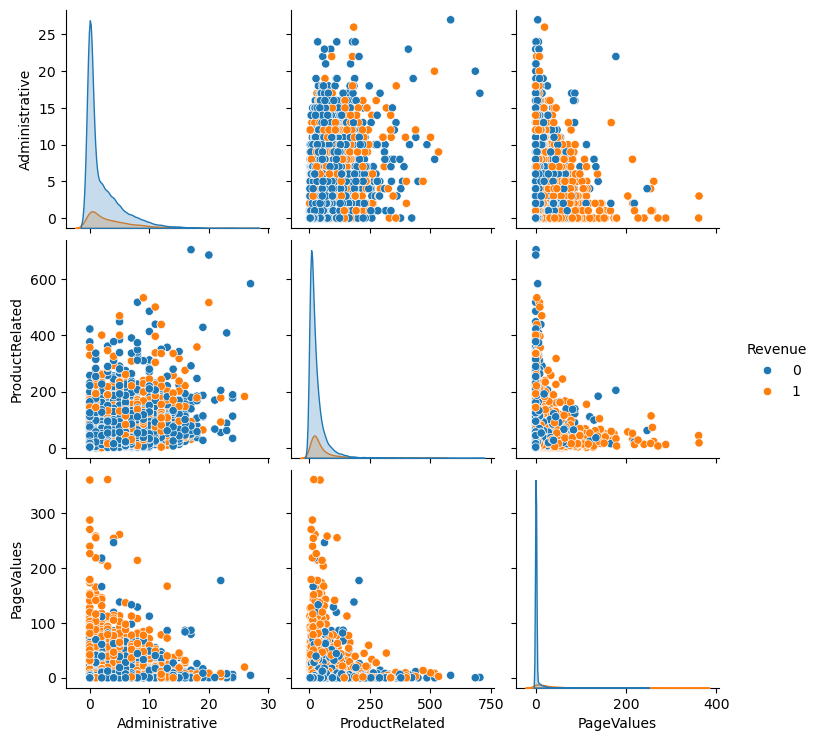

In [11]:
# We try to explore the relationship between the features with relative 'high' correlation and revenue.
high_correlation_features = ['Administrative',  'ProductRelated', 'PageValues', 'Revenue']
sns.pairplot(df[high_correlation_features], hue='Revenue')
plt.show()

In [12]:
# Print and see categorical features and their value counts
print('Value counts for categorical features:')
print('')
print(df['Month'].value_counts())
print('')
print(df['VisitorType'].value_counts())

Value counts for categorical features:

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


#### Data Exploration Observations:


- The dataset has 12,330 rows and 18 features.
- No missing values are present in the dataset.
- Features include a mix of numerical (14), categorical (2), and boolean (2) data types.

  
- The 'Revenue' column (converted to integer) indicates whether the user generated revenue, this is our target.
- 84.5% (10,422) of the users did not generate revenue and 15.5% (1,908) of the users generated revenue.


- Heatmap reveals moderate correlations between several numerical features.
- Key numerical features with relative high correlation with Revenue include 'Administrative',  'ProductRelated', 'PageValues', 'Revenue'.
- No features are highly negatively correlated with each other.


- 'Month' and 'VisitorType' are the key categorical features:
- Majority of visitors are returning visitors (10,551), with fewer new visitors (1,694).

  
- We try to explore the relationship between the features with relative 'high' correlation and revenue, but from the plots it is not possible to see any clear trend.

## 3. Data Preprocessing

The work done in the Data Processing is:

- Convert categorical columns to numerical with encoding and onehot encoder
- Outlier detection with z-score
- Analyze the distribution of features and scale features with minimax scaler.
- Use smote to oversample target distribution (Revenue)

In [13]:
# Convert categorical features into numerical features.
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['Month'] = df['Month'].map(month_mapping)

encoder = OneHotEncoder(sparse_output=False, dtype=int)

encoded_feature = encoder.fit_transform(df[['VisitorType']])

df_encoded = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(['VisitorType']))

df = pd.concat([df, df_encoded], axis=1)

df.drop('VisitorType', axis=1, inplace=True)

In [14]:
# Use z-score for outlier detection
z_outliers_score = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
z_outliers_score = np.abs(z_outliers_score)

threshold = 3
outliers= (z_outliers_score > threshold)

print('Amount of outliers detected for each feature:')
print(outliers.sum())

df_outliers = df[(z_outliers_score < threshold).all(axis=1)]
print("Shape after removing outliers:", df_outliers.shape)

Amount of outliers detected for each feature:
Administrative                   213
Administrative_Duration          232
Informational                    260
Informational_Duration           230
ProductRelated                   236
ProductRelated_Duration          219
BounceRates                      708
ExitRates                        713
PageValues                       259
SpecialDay                       479
Month                              0
OperatingSystems                 111
Browser                          376
Region                             0
TrafficType                      226
Weekend                            0
Revenue                            0
VisitorType_New_Visitor            0
VisitorType_Other                 85
VisitorType_Returning_Visitor      0
dtype: int64
Shape after removing outliers: (9556, 20)


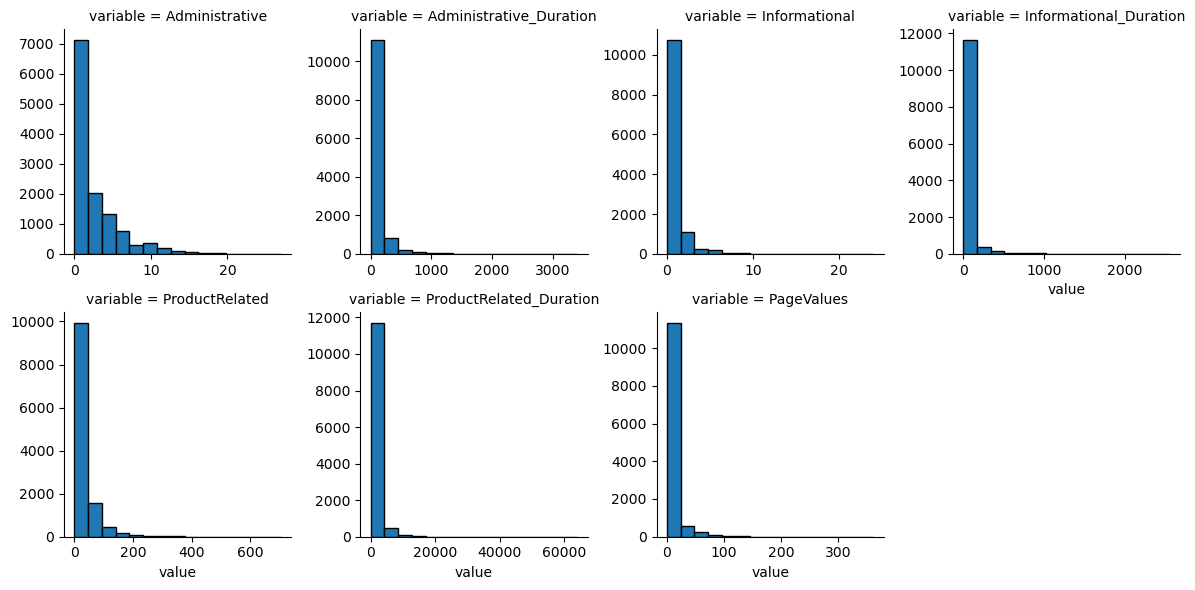

In [15]:
# Analyze distribution of columns to be scaled
columns_to_scale = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration', 'PageValues']


df_hist = df[columns_to_scale]

hist_grid = sns.FacetGrid(pd.melt(df_hist), col='variable', col_wrap=4, sharex=False, sharey=False)
hist_grid.map(plt.hist, 'value', edgecolor='black', bins=15)

plt.show()

In [16]:
# Use minimax scaler to scale the columns with non-normal behaviour
columns_to_scale = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration', 'PageValues']

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

df_outliers_scaled = df_outliers.copy()

df_outliers_scaled[columns_to_scale] = scaler.fit_transform(df_outliers[columns_to_scale])

In [17]:
# Use smote to oversample when revenue == 1
X = df_outliers_scaled.drop('Revenue', axis=1)
y = df_outliers_scaled['Revenue']

smote = SMOTE(random_state=1)

X_os, y_os = smote.fit_resample(X, y)

# Check the class distribution after resampling
print('Revenue distribution after SMOTE resampling:')
print(pd.Series(y_os).value_counts())

df_out_sca_sampled = pd.concat([pd.DataFrame(X_os, columns=X.columns), pd.Series(y_os, name='Revenue')], axis=1)

Revenue distribution after SMOTE resampling:
Revenue
0    8186
1    8186
Name: count, dtype: int64


#### Data Processing Observations:

- The encoding of the Month feature was a standard encoding since the data is ordinal.
- The encoding of the Visitor Type was a one hot encoder, which created 3 new columns.
- After performing the outlier detection with z-score a little over 2,700 rows were removed.
- The columns selected to be scaled are columns without a fixed range and non binary columns.
- The distribution of the selected columns is not a normal distribution (standard), that is why minimax was selected to scale them.
- After performing the oversample method, the target distribution is 50% for each class, perfectly balanced.

## 4. Feature Engineering

The work done in the Feature Engineering is:

- Creating relevant new features.

In [18]:
# We are creating two new features which might be useful
df_out_sca_sampled['Total_session_duration'] = (df_out_sca_sampled['Administrative_Duration'] + 
                                                df_out_sca_sampled['Informational_Duration'] +
                                                df_out_sca_sampled['ProductRelated_Duration'])


df_out_sca_sampled['Pages_per_minute'] = df_out_sca_sampled['ProductRelated'] / (df_out_sca_sampled['Total_session_duration'] + 0.000001)

#### Feature Engineering Observations:

- Created two new features 'Total_session_duration' and 'Pages_per_minute'
- It might be useful to see the total session duration and the number of pages per minute, since these columns might be better describing the behaviour of the shoppers.

## 5. Model Evaluation Function

The work done in the Model Evaluation Function is:

- Creating relevant an evaluation function.
- Which through it's metrics would allow to understand the performance of a model
- And would allow us to reuse it every time a n ew model is being tested.

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, 
                             roc_curve, precision_score, recall_score, f1_score, accuracy_score)


def evaluate_model(model, X, y, model_name='Model'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    start = time.time()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    end = time.time()
    final = end - start
    print(f"Time to run {model_name}: {final:.2f} seconds")
    print('')
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')
    print(f"Cross validation accuracy mean: {np.mean(cv_scores):.3f}")
    print('')
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print(f"{model_name} evaluation metrics and performance:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 score: {f1:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print('')
    
    print('Classification report:')
    print(classification_report(y_test, y_pred))
    print('')
    
    print('Confusion matrix:')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=['No purchase', 'Purchase'], yticklabels=['No purchase', 'Purchase'])
    plt.title(f'{model_name} confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('')
    
    false_positive, true_positive, threshold = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(false_positive, true_positive, label=f'{auc:.3f} ROC curve area ')
    plt.plot([0, 1], [0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'{model_name} ROC curve ')
    plt.legend(loc='lower right')
    plt.show()

#### Model Evaluation Function Observations:

The evaluation function does the following:

- The dataset is split into training (80%) and testing (20%) sets using train_test_split().
  
- The model is trained on the training set, and predictions 'y_pred' and prediction probabilities 'y_prob' are generated on the test set.

- It performs 4-fold cross-validation on the training set and prints the average accuracy across folds.

- Performance metrics are calculated, including: Accuracy, precision, recall, F1 score, and AUC-ROC score.

- A confusion matrix is plotted, showing the true vs. predicted values.

- The ROC curve is plotted to visualize the model's performance across thresholds.

- The time for training and evaluation is displayed for performance.

  

The evaluation methods used in this function are essential for evaluating different aspects of a model's performance.

1. Accuracy:
   - Measures the proportion of correct predictions out of all predictions.
   - Useful for understanding overall model performance, since our task is not critical it is really useful to understand the overall accuracy.

2. Precision:
   - Measures the proportion of true positives out of all predicted positives.
   - Important when the cost of false positives is high, in our task it is important to lower the amount of false positives. meaning false posible purchases

3. Recall:
   - Measures the proportion of true positives out of all actual positives.
   - Critical when missing false negatives is important.

4. F1 Score:
   - The harmonic mean of precision and recall.
   - Useful when there is a need to balance precision and recall.

5. AUC-ROC:
   - Measures the trade-off between the true positive rate and false positive rate at different thresholds.
   - AUC provides a single value summarizing model performance.

6. Cross-Validation:
   - Helps evaluate model stability and performance across different subsets of the training data.
   - Reduces the risk of overfitting.

7. Confusion Matrix:
   - Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
   - Helps visualize the performance of the model. Excelent to identify trends in the purchase predictions for our shoppers.

8. ROC Curve:
   - Visualizes the model's performance across various classification thresholds.
   - Helpful in identifying the best threshold for classification.


## 6. Model Selection and Evaluation

The work done in the Model Selection and Evaluation is:

- Split the data int X and y, (features & target)
- Create, test and evaluate (with our evaluation function) the following models:

  1. Logistic regression
  2. K-Neighbors classifier
  3. Suport Vector Machines (SVM) classifier
  4. Decision Tree Classifier
  5. Random Forest
  6. Naive Bayes
 
Since the task is a binary classification, this are the algorithms that are designed for such task, even though regression algorithms like linear regression or random forest regression if modified might work, it is best to start by using the algorithms designed and built for classification. So in this case we will skip linear regression.

In [20]:
X = df_out_sca_sampled.drop('Revenue', axis=1)
y = df_out_sca_sampled['Revenue']

Time to run Logistic Regression: 0.09 seconds

Cross validation accuracy mean: 0.847

Logistic Regression evaluation metrics and performance:
Accuracy: 0.850
Precision: 0.889
Recall: 0.803
F1 score: 0.844
AUC-ROC: 0.922

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1628
           1       0.89      0.80      0.84      1647

    accuracy                           0.85      3275
   macro avg       0.85      0.85      0.85      3275
weighted avg       0.85      0.85      0.85      3275


Confusion matrix:


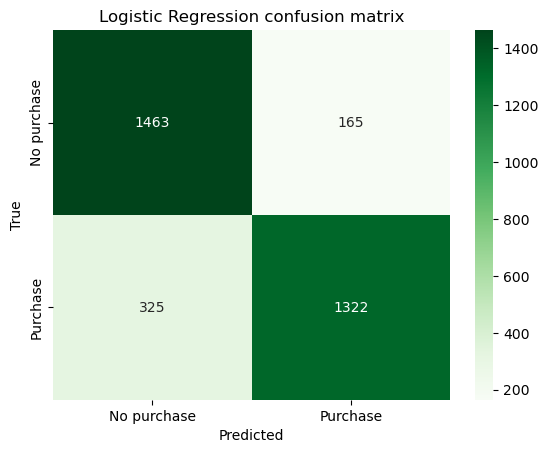

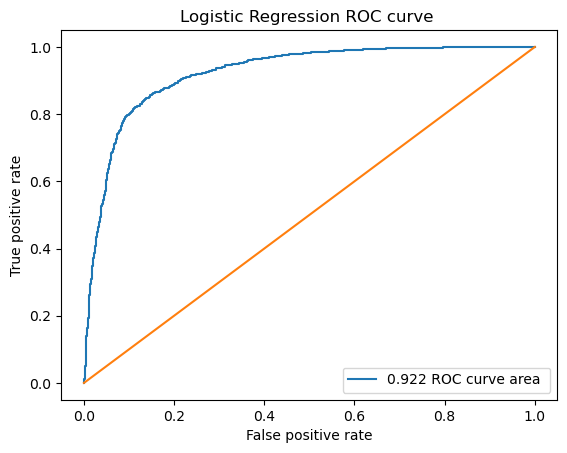

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=1)

evaluate_model(log_reg_model, X, y, model_name='Logistic Regression')

Time to run KNN Classifier: 0.15 seconds

Cross validation accuracy mean: 0.801

KNN Classifier evaluation metrics and performance:
Accuracy: 0.823
Precision: 0.765
Recall: 0.933
F1 score: 0.841
AUC-ROC: 0.904

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1628
           1       0.77      0.93      0.84      1647

    accuracy                           0.82      3275
   macro avg       0.84      0.82      0.82      3275
weighted avg       0.84      0.82      0.82      3275


Confusion matrix:


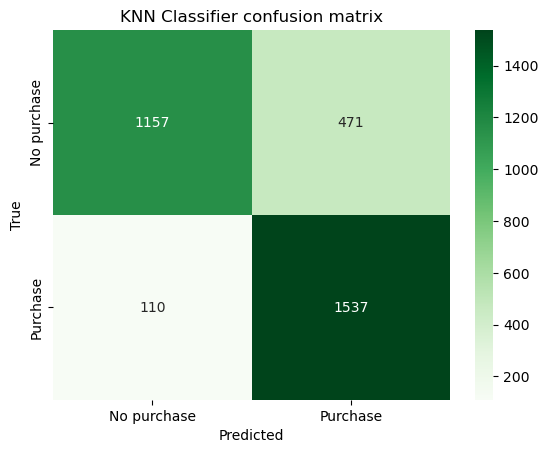

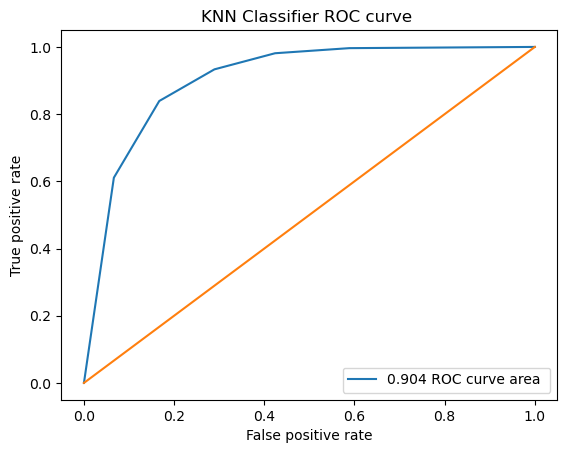

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

evaluate_model(knn_model, X, y, model_name='KNN Classifier')

Time to run SVM Classifier: 23.85 seconds

Cross validation accuracy mean: 0.521

SVM Classifier evaluation metrics and performance:
Accuracy: 0.497
Precision: 0.000
Recall: 0.000
F1 score: 0.000
AUC-ROC: 0.639

Classification report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1628
           1       0.00      0.00      0.00      1647

    accuracy                           0.50      3275
   macro avg       0.25      0.50      0.33      3275
weighted avg       0.25      0.50      0.33      3275


Confusion matrix:


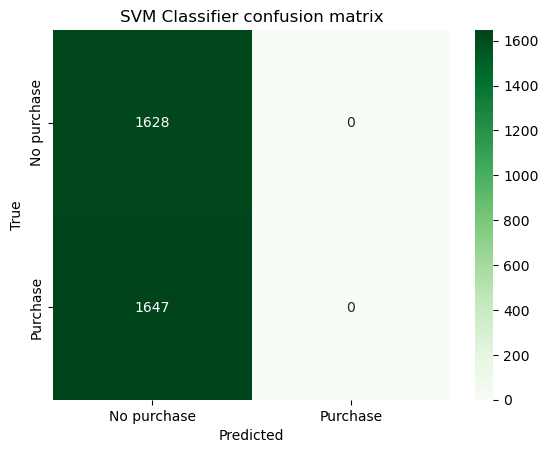

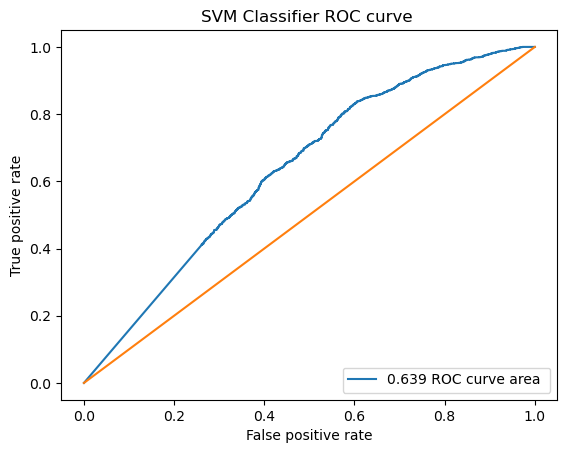

In [23]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=1)

evaluate_model(svm_model, X, y, model_name='SVM Classifier')

Time to run Decision Tree: 0.09 seconds

Cross validation accuracy mean: 0.888

Decision Tree evaluation metrics and performance:
Accuracy: 0.902
Precision: 0.901
Recall: 0.904
F1 score: 0.902
AUC-ROC: 0.902

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1628
           1       0.90      0.90      0.90      1647

    accuracy                           0.90      3275
   macro avg       0.90      0.90      0.90      3275
weighted avg       0.90      0.90      0.90      3275


Confusion matrix:


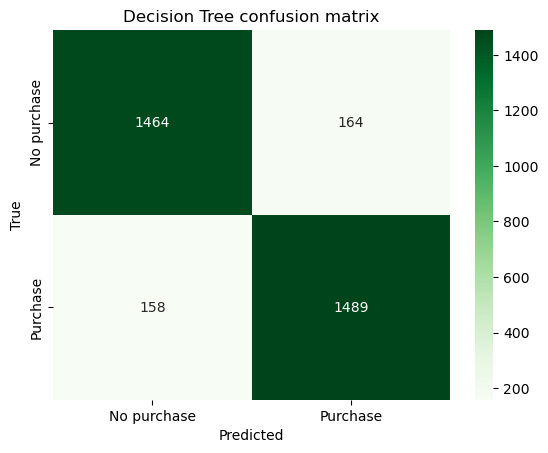

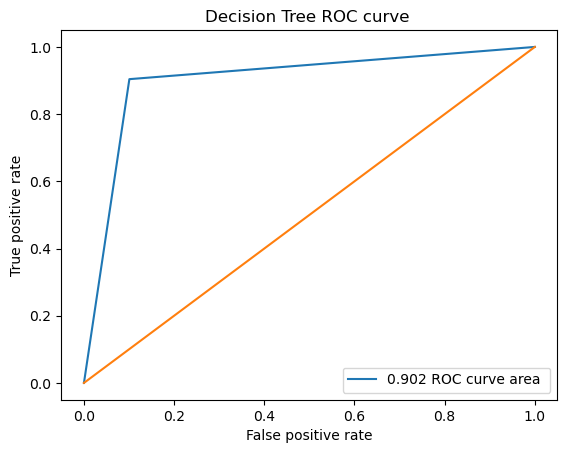

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=1)

evaluate_model(decision_tree_model, X, y, model_name='Decision Tree')

Time to run Random Forest: 1.44 seconds

Cross validation accuracy mean: 0.927

Random Forest evaluation metrics and performance:
Accuracy: 0.927
Precision: 0.913
Recall: 0.946
F1 score: 0.929
AUC-ROC: 0.981

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1628
           1       0.91      0.95      0.93      1647

    accuracy                           0.93      3275
   macro avg       0.93      0.93      0.93      3275
weighted avg       0.93      0.93      0.93      3275


Confusion matrix:


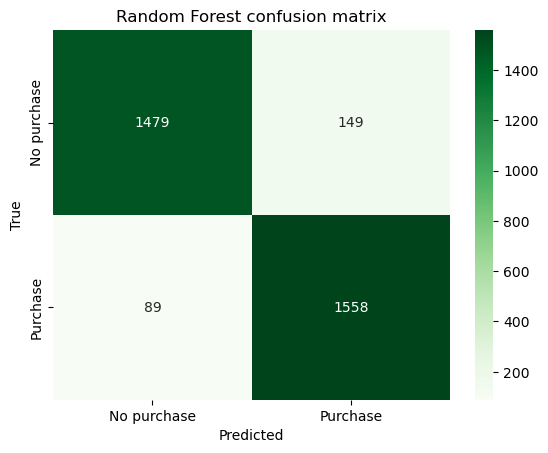

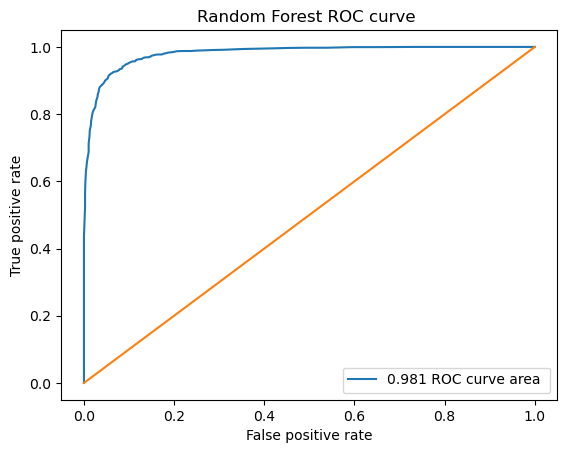

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=1)

evaluate_model(random_forest_model, X, y, model_name='Random Forest')

Time to run Naive Bayes: 0.00 seconds

Cross validation accuracy mean: 0.618

Naive Bayes evaluation metrics and performance:
Accuracy: 0.618
Precision: 0.570
Recall: 0.983
F1 score: 0.721
AUC-ROC: 0.855

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.25      0.39      1628
           1       0.57      0.98      0.72      1647

    accuracy                           0.62      3275
   macro avg       0.75      0.62      0.56      3275
weighted avg       0.75      0.62      0.56      3275


Confusion matrix:


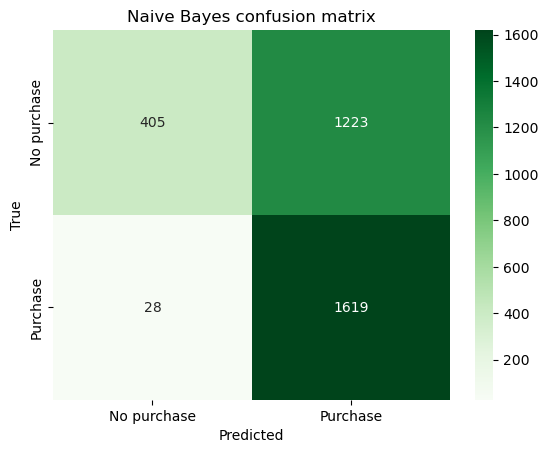

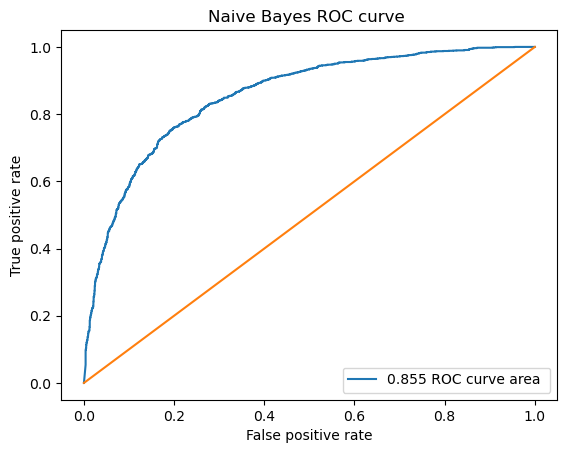

In [26]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

evaluate_model(naive_bayes_model, X, y, model_name='Naive Bayes')

#### Model Selection and Evaluation Observations:

- After running the following algorithms/models and evaluating them with the evaluate_model function. These are the results:
  1. Logistic regression
  2. K-Neighbors classifier
  3. Suport Vector Machines (SVM) classifier
  4. Decision Tree Classifier
  5. Random Forest
  6. Naive Bayes


| Model               | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|---------------------|----------|-----------|--------|----------|---------|
| Logistic Regression  | 0.850    | 0.889     | 0.883  | 0.844    | 0.922   |
| KNN Classifier       | 0.823    | 0.765     | 0.933  | 0.841    | 0.904   |
| SVM Classifier       | 0.497    | 0.000     | 0.000  | 0.000    | 0.639   |
| Decision Tree        | 0.902    | 0.901     | 0.904  | 0.902    | 0.902   |
| Random Forest        | 0.927    | 0.913     | 0.946  | 0.929    | 0.981   |
| Naive Bayes          | 0.618    | 0.578     | 0.983  | 0.721    | 0.855   |


The choosen model is Random Forest because:

   - Random Forest model has the highest accuracy of 0.927 it correctly classifies 92.7% of the rows in the dataset.

   - Random Forest exhibits Precision of 0.913 and Recall of 0.946, both of which are very strong.

   - A good balance between precision and recall is crucial in classification problems, F1-score combines precision and recall and for Random Forest is 0.929, which is the highest among all the models.

   - The AUC-ROC score is 0.981 which indicates that the model is great distinguishing between the two classes in the Revenue.

   - Random Forest is known for correctly handling overfitting.
     
   - Random Forest handles imbalanced datasets well

   - Random Forests can give insight into feature importance, helping to identify which features contribute mosts.

<br>

Comparison with Other Models:
   - Logistic Regression: With an AUC-ROC of 0.922, it is close but doesn't outperform Random Forest in accuracy, precision, recall, or F1-score.
   - KNN Classifier: its precision (0.765) is much lower than Random Forest.
   - SVM Classifier: The SVM model performed very poorly, with no ability to detect the positive class at all.
   - Decision Tree: has strong performance, but it tends to overfit compared to Random Forest.
   - Naive Bayes: It has the lowest accuracy (0.618), precision (0.578), and F1-score (0.721), making it the worst performer.

## 7. Model Hypertuning and Refinement

The work done in the Model Hypertuning and Refinement is:

- Create a new "simpler" evaluation function.
- Get the feature importance for random forest.
- Remove the least important features.
- Perform random search tuning the following hyperparameters and parameters with cross validation:
  - n_estimators
  - max_depth
  - min_samples_split
  - min_samples_leaf
  - max_features
  - bootstrap
- Select the best hyperparameters and retrain the model.
- Validate the model with cross validation

In [27]:
# define function to evaluate the hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

def evaluate_random_forest(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"Random forest evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")


PageValues                       0.414433
Administrative                   0.083074
Administrative_Duration          0.060825
ExitRates                        0.056569
ProductRelated_Duration          0.052851
ProductRelated                   0.045364
Total_session_duration           0.043237
Month                            0.042575
Pages_per_minute                 0.041849
Informational                    0.032529
BounceRates                      0.032032
TrafficType                      0.017950
Region                           0.017869
Informational_Duration           0.014063
OperatingSystems                 0.011642
Browser                          0.010192
VisitorType_Returning_Visitor    0.009212
Weekend                          0.006477
VisitorType_New_Visitor          0.005535
SpecialDay                       0.001722
VisitorType_Other                0.000000
dtype: float64

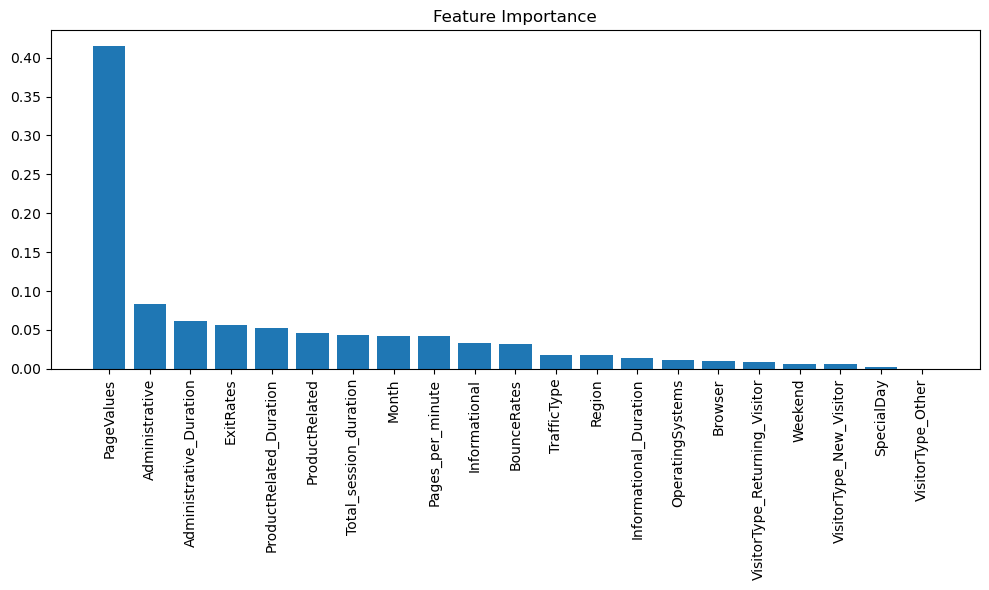

In [28]:
random_forest_model.fit(X, y)

importances = random_forest_model.feature_importances_
importances = pd.Series(importances, index=X.columns)
importances = importances.sort_values(ascending=False)

display(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(importances.index, importances.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
# drop anything with importance under 1%
columns_to_drop = ['Browser', 'VisitorType_Returning_Visitor', 'Weekend', 'VisitorType_New_Visitor', 'SpecialDay', 'VisitorType_Other']
df_out_sca_sampled_col = df_out_sca_sampled.drop(columns_to_drop, axis=1)

In [30]:
X_v2 = df_out_sca_sampled.drop('Revenue', axis=1)
y_v2 = df_out_sca_sampled['Revenue']

evaluate_random_forest(random_forest_model, X_v2, y_v2)


Random forest evaluation
Accuracy: 0.9273
Precision: 0.9127


In [31]:
# RANDOM GRID SEARCH


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

start_time = time.time()

random_forest_model = RandomForestClassifier(random_state=1)

random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=1, n_jobs=-1)

random_search.fit(X, y)

print(f"Best parameters from RANDOM search: {random_search.best_params_}")

best_random_forest_model = random_search.best_estimator_

evaluate_random_forest(best_random_forest_model, X_v2, y_v2)

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from RANDOM search: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Random forest evaluation
Accuracy: 0.9365
Precision: 0.9200
Time taken: 322.01558804512024 seconds


Time to run Random Forest: 10.94 seconds

Cross validation accuracy mean: 0.933

Random Forest evaluation metrics and performance:
Accuracy: 0.936
Precision: 0.920
Recall: 0.957
F1 score: 0.938
AUC-ROC: 0.985

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1628
           1       0.92      0.96      0.94      1647

    accuracy                           0.94      3275
   macro avg       0.94      0.94      0.94      3275
weighted avg       0.94      0.94      0.94      3275


Confusion matrix:


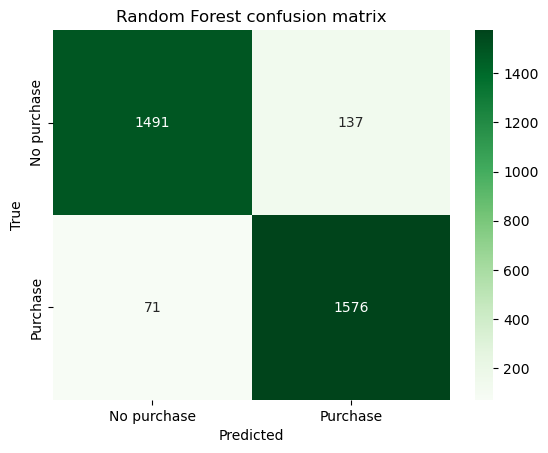

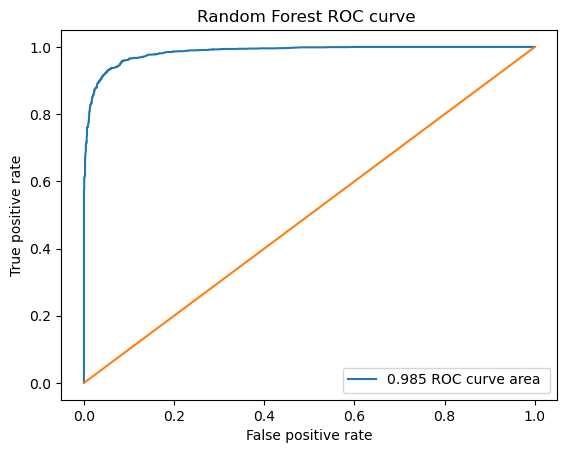

In [34]:
best_parameters_random_forest_model = RandomForestClassifier(
    random_state=1, 
    n_estimators=500, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features="sqrt",
    max_depth=30, 
    bootstrap=False
)

evaluate_model(best_parameters_random_forest_model, X_v2, y_v2, model_name='Random Forest')

Model Hypertuning and Refination Observations:

- PageValues is the most important feature by a significant margin, followed by Administrative, Administrative_Duration, and ExitRates.
 - The following features had close to none contribution (less than 1%)and were eliminated VisitorType_Returning_Visitor, SpecialDay, and VisitorType_New_Visitor.

 
- RandomizedSearchCV and GridSearchCV were used to find the optimal hyperparameters for the random forest model.
- The parameters tunned were 'n_estimators', 'max_depth, 'min_samples_split', 'min_samples_leaf', 'max_features', and 'bootstrap'.

 
- For Random search out of all the combinations 500 combinations were run, the best parameters resulted in an accuracy of **0.9365** and precision of **0.9220**.
- The model took approximately **5.2 minutes** for this randomized search.

 
- For Grid search all the combinations were run, the best parameters resulted in an accuracy of **0.9369** and precision of **0.9260**.
- The model took approximately over **6.9 hours** for this Grid search.

 
- These experiments and tunning suggest that the Random Forest classifier is performing well after tuning, and more hyperparameter optimization would not bring significant improvements.


## 8. Final Model Training and Testing

Cross validation accuracy mean: 0.934

Final Random Forest model evaluation metrics and performance:
Accuracy: 0.941
Precision: 0.928
Recall: 0.958

Confusion matrix:


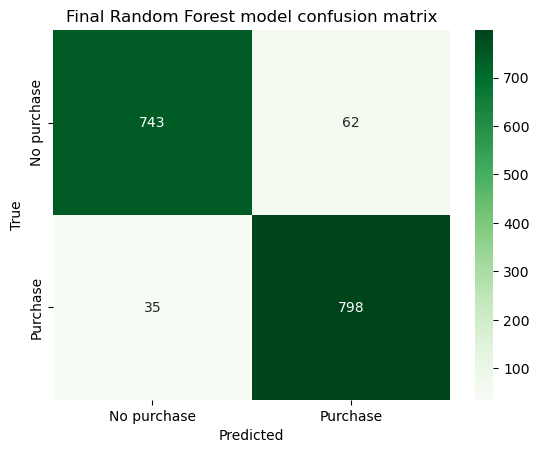

In [35]:
final_model =  RandomForestClassifier(
    random_state=1, 
    n_estimators=500, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features="sqrt",
    max_depth=30, 
    bootstrap=False
)

X = df_out_sca_sampled.drop('Revenue', axis=1)
y = df_out_sca_sampled['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    
final_model.fit(X_train, y_train)
    
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]
    
cv_scores = cross_val_score(final_model, X_train, y_train, cv=4, scoring='accuracy')
print(f"Cross validation accuracy mean: {np.mean(cv_scores):.3f}")
print('')
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Final Random Forest model evaluation metrics and performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print('')


print('Confusion matrix:')
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No purchase', 'Purchase'], yticklabels=['No purchase', 'Purchase'])
plt.title('Final Random Forest model confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('')


In [39]:
# Train the model one last time with the whole dataset and then export it
final_trained_model =  RandomForestClassifier(
    random_state=1, 
    n_estimators=500, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features="sqrt",
    max_depth=30, 
    bootstrap=False
)

final_trained_model.fit(X, y)

import pickle

with open('online_shopper_prediction_model.pkl', 'wb') as file:
    pickle.dump(final_trained_model, file)

## 9. Conclusions

After going through the process of exploring, cleaning, and manipulating the data, and testing six different algorithms, we found that the Random Forest classifier works best for this case. 

By fine-tuning the parameters extensively, we identified the optimal settings for now. Our model is capable of predicting whether a shopper will make a purchase or not with an accuracy of **94.1%** (when trained with 90% of the data. This accuracy helps us better understand the key factors that drive user decisions, spot opportunities in the user journey, and even make live adjustments or improvements to the user experience for different types of users.

## 10. References

Source of dataset: https://www.kaggle.com/datasets/henrysue/online-shoppers-intention/data
Sources of documentation: 

- https://scikit-learn.org/1.5/user_guide.html
- https://seaborn.pydata.org/tutorial/function_overview.html